In [1]:
import pandas as pd
import numpy as np
import yaml
import seaborn as sns
import matplotlib.pyplot as plt


from tqdm.auto import tqdm  # for notebooks
tqdm.pandas()


prefix = '/home/klawren/oak/pcqtls'

import sys
sys.path.append('/home/klawren/oak/pcqtls/workflow/scripts')
from notebook_helper_functions import *

## p value comparisons

is this bad to do? does it fall under the comparing p-vals fallecy? I think not, becuase I'm comparing p values as a way to compare the underlying variablity of the data, the effect size and sample size should (in theory) be constant

* comparing p values for the full size data
* comparing p values at each point

In [2]:
main_config_path= f'{prefix}/config/proteincoding_main.yaml'
with open(main_config_path, 'r') as f:
    config = yaml.safe_load(f)

my_tissue_id= 'Lung'

In [29]:
e_nominal = load_e_nominal_all_chr(config, my_tissue_id)
pc_nominal = load_pc_nominal_all_chr(config, my_tissue_id)

In [30]:
# get the minimum per cluster p value
pc_pvals = pc_nominal.groupby('cluster_id').agg({'pval_nominal':min})
e_pvals = e_nominal.groupby('cluster_id').agg({'pval_nominal':min})

cluster_pvals = pd.merge(pc_pvals, e_pvals, on='cluster_id', suffixes=['_pc','_e'])
cluster_pvals['log_pc_pval'] = np.log10(cluster_pvals['pval_nominal_pc'])
cluster_pvals['log_e_pval'] = np.log10(cluster_pvals['pval_nominal_e'])

Text(0, 0.5, 'pcqtl min pvalue')

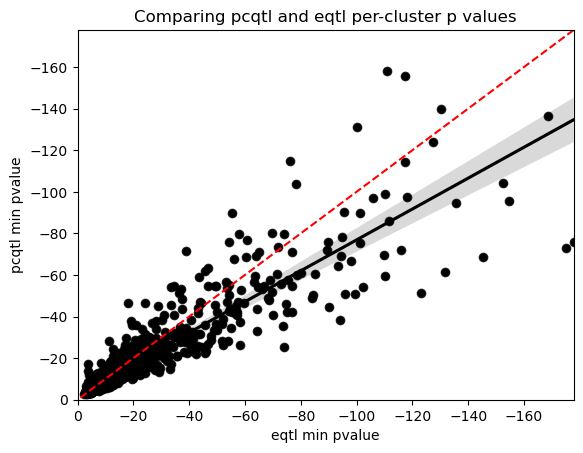

In [43]:

ax = sns.scatterplot(cluster_pvals, y='log_pc_pval', x='log_e_pval', color='k')
ax = sns.regplot(cluster_pvals, y='log_pc_pval', x='log_e_pval', color='k')

ax_lims = [pd.concat([cluster_pvals['log_pc_pval'], cluster_pvals['log_e_pval']]).min(),0]
ax.set_ylim(ax_lims)
ax.set_xlim(ax_lims)

ax.invert_yaxis()
ax.invert_xaxis()

# diagonal line
ax.plot(ax_lims, ax_lims, color='red', linestyle='--')

ax.set_title('Comparing pcqtl and eqtl per-cluster p values')
ax.set_xlabel('eqtl min pvalue')
ax.set_ylabel('pcqtl min pvalue')

In [58]:
# try filtering to say, only clusters with very high correlation
cluster_df = load_cluster(config, my_tissue_id)
corr_cutoff = .5
high_cor_clusters = cluster_df[(cluster_df['Mean_pos_cor'] > corr_cutoff) | (cluster_df['Mean_neg_cor'] < -corr_cutoff)]['cluster_id']

Text(0, 0.5, 'pcqtl min pvalue')

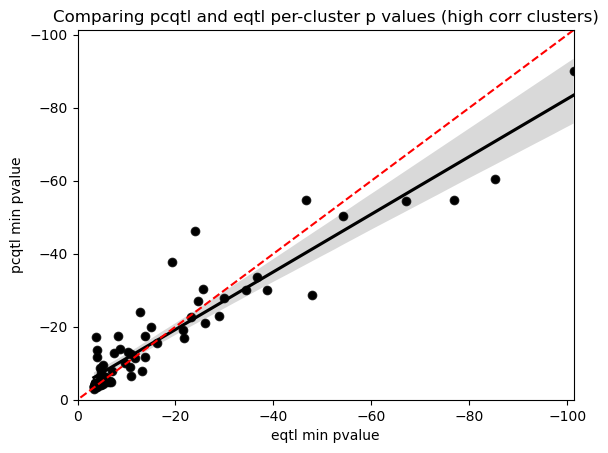

In [59]:
sub_cluster = cluster_pvals[cluster_pvals.index.isin(high_cor_clusters)]

ax = sns.scatterplot(sub_cluster, y='log_pc_pval', x='log_e_pval', color='k')
ax = sns.regplot(sub_cluster, y='log_pc_pval', x='log_e_pval', color='k')

ax_lims = [pd.concat([sub_cluster['log_pc_pval'], sub_cluster['log_e_pval']]).min(),0]
ax.set_ylim(ax_lims)
ax.set_xlim(ax_lims)
ax.invert_yaxis()
ax.invert_xaxis()

# diagonal line
ax.plot(ax_lims, ax_lims, color='red', linestyle='--')

ax.set_title('Comparing pcqtl and eqtl per-cluster p values (high corr clusters)')
ax.set_xlabel('eqtl min pvalue')
ax.set_ylabel('pcqtl min pvalue')

In [71]:
# filter to just multigene eqtls
overlap = load_overlap(config, my_tissue_id)
multigene_clusters = overlap[overlap['num_e_samelead'] > 1]['cluster_id']

Text(0, 0.5, 'pcqtl min pvalue')

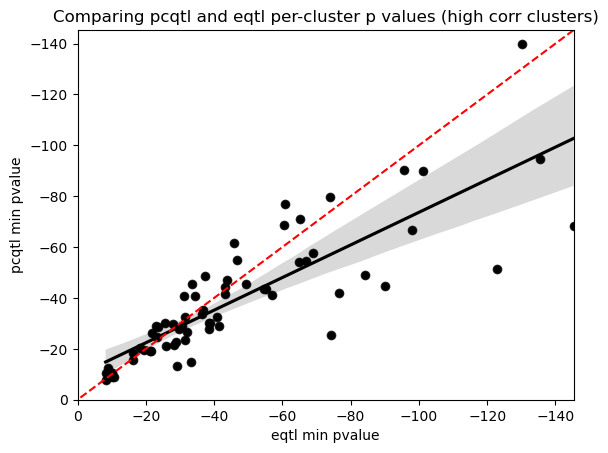

In [72]:
sub_cluster = cluster_pvals[cluster_pvals.index.isin(multigene_clusters)]

ax = sns.scatterplot(sub_cluster, y='log_pc_pval', x='log_e_pval', color='k')
ax = sns.regplot(sub_cluster, y='log_pc_pval', x='log_e_pval', color='k')

ax_lims = [pd.concat([sub_cluster['log_pc_pval'], sub_cluster['log_e_pval']]).min(),0]
ax.set_ylim(ax_lims)
ax.set_xlim(ax_lims)
ax.invert_yaxis()
ax.invert_xaxis()

# diagonal line
ax.plot(ax_lims, ax_lims, color='red', linestyle='--')

ax.set_title('Comparing pcqtl and eqtl per-cluster p values (high corr clusters)')
ax.set_xlabel('eqtl min pvalue')
ax.set_ylabel('pcqtl min pvalue')